 ###  Лабораторная работа №6.
###  Поиск экстемума функции многих переменных.

### Поиск точки минимума заданной функции методом Ньютона-Рафсона:
В этом методе направление спуска определяется формулой $p^{k}$ = −$[$\sqr{ $\Grad$}$ $f(x_k)]^{−1}$ $\Delta$ f(x_k)$, а множитель $α_k$, регулирующий длину шага, можно выбирать, одним из следующих способов: 

А) как и в методе наискорейшего спуска из условия минимума   f($x_k$ + $\Alpha_k$ $p_k$) = $\min$ f($x_k$ + $\Alpha$ $p_k$), при $\Alpha$ $\leq$ 0;

Б) так, чтобы выполнялось неравенство f($x_k$ + $\Alpha_k$ $p_k$) $\leq$ f($x_k$) + $\Epsilon$ $\Alpha_k$ ($\Delta$ f($x_k$),$p_k$), где $\Epsilon$ $\in$(0,1/2)-наперед заданная постоянная, одна и та же для всех итераций. Алгоритм нахождения множителя $\Alpha_k$ здесь такой же, как и в градиентном методе с дроблением шага. Начальное значение $\Alpha$=1.

Но сходимость заведомо гарантируется лишь при положительной определенности гессиана функции $f(x)$.

Нахождени  $\Alpha_k$. $λ$ $\in$ (0,1).Параметр $\Lambda$ называется коэффициентом дробления. Значения параметров выбираются наперед; они одни и те же для всех итераций. Положив сначала $\Alpha'$ = $\Alpha$, проверим неравенство f($x_k$ + $\Alpha'$ $p_k$) $\leq$ f($x_k$) (4). Если оно выполнено, то берем $\Alpha_k$ = $\Alpha'$. В противном случае значение $α'$ изменяем, домножив его на $λ$ (дробление $α'$). Снова проверяем (4). И так до тех пор, пока неравенство (4) не выполнится. То значение $\Alpha'$, при котором это произойдет впервые, и выбираем в качестве $\Alpha_k$. 

### Выводы: 
Овражность в окрестности точки минимума {-2,1.5,1} = 3;  
Исследование условий сходимости: для данной функции метод будет выдавать экстремум за одну итерацию.

Реутов А.431

In [1]:
import numpy as np
from numpy import linalg as la
a=np.zeros([3,3])
a[0][0]=4;a[1][1]=2;a[2][2]=6;                  #gessian
x=[-1,3,4];
def f(x):
 x1=x[0]; x2=x[1]; x3=x[2];
 return( 2*((x1+2)**2) + ((x2-1.5)**2) + 3*((x3-1)**2) )

def f11(x):
 x1=x[0]; x2=x[1];
 return( 2*((x1+2)**2) + ((x2-1.5)**2) )

def f1p(x):
 x1=x[0]; x2=x[1]; x3=x[2];
 a=np.zeros(3)                                           #dradient
 a[0]=4*(x1+2); a[1]=2*(x2-1.5); a[2]=6*(x3-1);
 return(a)

def p(x):
 x1=x[0]; x2=x[1]; x3=x[2];
 p2=la.solve(a,-f1p(x))
 return (p2)

e=0.4;
aa1=np.ones(3);
lamb=0.5;
aa=1

f1=f(x)+e*aa*np.dot(f1p(x),p(x))
f2=f(x+aa*p(x))

g = f2-f1
while g >0:
 aa=aa*lamb
 f1=f(x) +e*aa*(f1p(x)*p(x))
 f2=f(x+p(x))
print(x+aa*p(x))

print(la.eig(a)[0])                                     


[-2.   1.5  1. ]
[ 4.  2.  6.]


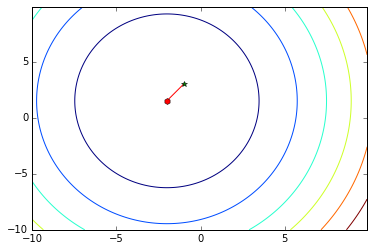

In [3]:
% matplotlib inline              
import matplotlib.pyplot as plt     
import numpy as np
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
XX, YY = np.meshgrid(X, Y, sparse=1)
Z = 2*((XX+2)**2) + ((YY-1.5)**2) 

q1=[-1]; w1=[3];q10=[-2]; w10=[1.5];
q=[-2,-1]; w=[1.5,3]

plt.plot(q,w,'r-')
plt.plot(q1,w1,'g*')
plt.plot(q10,w10,'r h')

plt.contour(X,Y,Z)
plt.show()

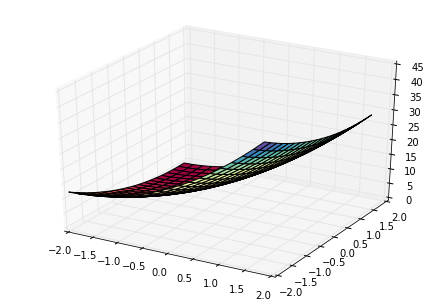

In [4]:
#график поверхности
from mpl_toolkits.mplot3d import Axes3D
import numpy
fig = plt.figure()
ax = Axes3D(fig)
X=numpy.arange(-2,2,0.2)
Y=numpy.arange(-2,2,0.2)
Xg, Yg = numpy.meshgrid(X, Y)
Z=f11(numpy.meshgrid(X,Y))
ax.plot_surface(Xg, Yg, Z, rstride=1, cstride=1, cmap='Spectral')
plt.show()

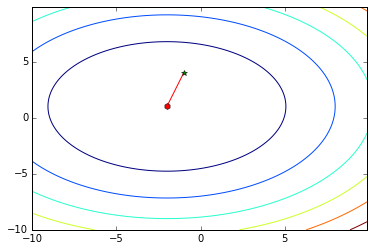

In [4]:
% matplotlib inline              
import matplotlib.pyplot as plt     
import numpy as np
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
XX, YY = np.meshgrid(X, Y, sparse=1)
Z = 2*((XX+2)**2) + 3*((YY-1)**2) 

q1=[-1]; w1=[4];q10=[-2]; w10=[1];
q=[-2,-1]; w=[1,4]

plt.plot(q,w,'r-')
plt.plot(q1,w1,'g*')
plt.plot(q10,w10,'r h')

plt.contour(X,Y,Z)
plt.show()

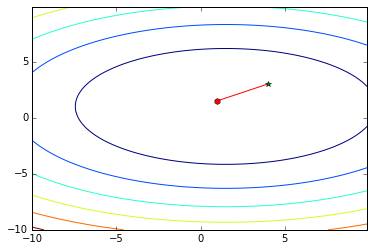

In [5]:
% matplotlib inline              
import matplotlib.pyplot as plt     
import numpy as np
X = np.arange(-10, 10, 0.1)
Y = np.arange(-10, 10, 0.1)
XX, YY = np.meshgrid(X, Y, sparse=1)
Z = ((XX-1.5)**2) + 3*((YY-1)**2) 

q1=[4]; w1=[3];q10=[1]; w10=[1.5];
q=[1,4]; w=[1.5,3]

plt.plot(q,w,'r-')
plt.plot(q1,w1,'g*')
plt.plot(q10,w10,'r h')

plt.contour(X,Y,Z)
plt.show()

In [48]:
import numpy as np
from numpy import linalg as la
import sympy as sym
from scipy.misc import derivative

def myf(x):
 x1=x[0];x2=x[1];x3=x[2];x4=x[3];x5=x[4];x6=x[5];x7=x[6];x8=x[7];x9=x[8];x10=x[9];
 return(((x1+2)**2) + ((x2-1.5)**2) + ((x3-1)**2) +((x4-6)**2)+((x5-2)**2) + ((x6-1.5)**2) + ((x7-1)**2)+ ((x8-6)**2)+((x9+7)**2) + ((x10-1.5)**2))
 
def f1p1(func, xk):
    grad=[]
    args = xk
    for i in range(0,len(xk)):
        def wraps(x):
            args[i] = x
            return (func(args))
        grad.append(derivative(wraps, xk[i], dx = 1e-6))
    return grad

def bb(myf,x,e1):

 a=np.zeros([10,10])
 a[0][0]=2;a[1][1]=2;a[2][2]=2; 
 a[3][3]=2;a[4][4]=2;a[5][5]=2;
 a[6][6]=2;a[7][7]=2;a[8][8]=2;
 a[9][9]=2;
 def p(x):
  x1=x[0];x2=x[1];x3=x[2];x4=x[3];x5=x[4];x6=x[5];x7=x[6];x8=x[7];x9=x[8];x10=x[9];
  g=np.array(f1p1(myf,x))
  p2=la.solve(a,-g)
  return (p2)

 e=e1;
 aa1=np.ones(10);
 lamb=0.5;
 aa=1

 f1=myf(x)+e*aa*np.dot((np.array(f1p1(myf,x))),p(x))
 f2=myf(x+aa*p(x))

 g = f2-f1
 while g > e:
  aa=aa*lamb
  f1=myf(x) +e*aa*((np.array(f1p1(myf,x)))*p(x))
  f2=myf(x+p(x))
 return(x+aa*p(x))
x1=[1,2,3,4,5,6,7,8,9,10]
print(bb(myf,x1,0.4)) 

[-1.99999899  1.500001    1.00000099  6.000001    2.00000099  1.500001
  1.00000099  6.00000101 -6.99999899  1.50000101]
